In [19]:
# IMPORT LIBRARIES
import pandas as pd
import seaborn as sns
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go
import pandas_datareader as web

In [20]:
spy_etf=web.DataReader('SPY','yahoo')

In [21]:
start=pd.to_datetime('2010-03-10')
end=pd.to_datetime('2020-03-10')

In [22]:
# READ THE STOCK DATA FILE
aapl=web.DataReader('AAPL','yahoo',start, end)

In [52]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-03-10,8.052857,7.971428,7.993928,8.030000,596218000.0,6.939038
2010-03-11,8.053572,7.975714,7.996786,8.053572,405700400.0,6.959407
2010-03-12,8.133214,8.062500,8.120358,8.092857,416323600.0,6.993356
2010-03-15,8.053572,7.866071,8.049286,7.994286,493502800.0,6.908176
2010-03-16,8.035000,7.946786,8.006429,8.016071,446908000.0,6.927001


In [53]:
stock_df=pd.read_csv('stock.csv')

In [54]:
stock_df.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


In [25]:
# SORT THE DATA BASED ON DATE
stock_df=stock_df.sort_values(by=['Date'])
stock_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [26]:
# Function to normalize the price based on the initial price
def normalize(df):
    x=df.copy()
    for i in x.columns[1:]:
        x[i]=x[i]/x[i][0]
    return x

In [27]:
#  Function to calculate the daily returns 
def daily_return(df):

  df_daily_return = df.copy()
  
  # Loop through each stock
  for i in df.columns[1:]:
    
    # Loop through each row belonging to the stock
    for j in range(1, len(df)):
      
      # Calculate the percentage of change from the previous day
      df_daily_return[i][j] = ((df[i][j]- df[i][j-1])/df[i][j-1]) * 100
    
    # set the value of first row to zero, as previous value is not available
    df_daily_return[i][0] = 0
  return df_daily_return

In [29]:
# Get the daily returns 
stocks_daily_return = daily_return(stock_df)
stocks_daily_return

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2012-01-13,-0.374946,-1.205144,-0.166006,1.813685,1.415339,-0.769869,-19.327430,-0.738516,-0.494792
2,2012-01-17,1.164812,0.857909,0.598603,-0.809717,1.815943,0.468852,16.717854,0.574410,0.355295
3,2012-01-18,1.038382,-0.239234,0.264463,3.918367,4.282725,0.594448,0.789470,0.688856,1.110793
4,2012-01-19,-0.316937,0.666134,0.296736,0.549882,2.644634,-0.303752,-0.186494,1.052283,0.493866
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,0.362467,5.579446,-0.533156,0.000000,2.109065,-0.309917,-0.133153,0.589774,0.642974
2155,2020-08-06,3.488923,-1.193483,-0.033501,10.406699,0.623082,0.534082,0.307062,1.797626,0.642770
2156,2020-08-07,-2.449458,-1.265966,0.603217,3.087768,-1.784187,-0.919762,-2.475194,-0.373974,0.063303
2157,2020-08-10,1.453480,5.522880,0.599604,13.767729,-0.609323,1.720552,-2.350092,0.107728,0.274222


Which of the following has higher average daily return?
S&P500 or Google
S&P500 or Amazon

# TASK #4: CALCULATE BETA FOR A SINGLE STOCK

In [30]:
# Select any stock, let's say Apple 
stocks_daily_return['AAPL']

0       0.000000
1      -0.374946
2       1.164812
3       1.038382
4      -0.316937
          ...   
2154    0.362467
2155    3.488923
2156   -2.449458
2157    1.453480
2158   -2.973987
Name: AAPL, Length: 2159, dtype: float64

<AxesSubplot:xlabel='sp500', ylabel='AAPL'>

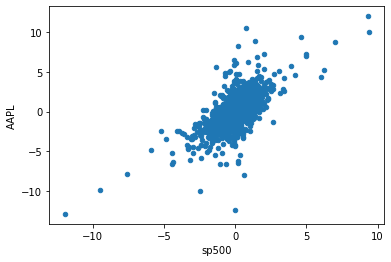

In [31]:
# plot a scatter plot between the selected stock and the S&P500 (Market)
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'AAPL')

In [32]:
# Fit a polynomial between the selected stock and the S&P500 (Poly with order = 1 is a straight line)

# beta represents the slope of the line regression line (market return vs. stock return). 
# Beta is a measure of the volatility or systematic risk of a security or portfolio compared to the entire market (S&P500) 
# Beta is used in the CAPM and describes the relationship between systematic risk and expected return for assets 

# Beta = 1.0, this indicates that its price activity is strongly correlated with the market. 
# Beta < 1, indicates that the security is theoretically less volatile than the market (Ex: Utility stocks). If the stock is included, this will make the portfolio less risky compared to the same portfolio without the stock.
# Beta > 1, indicates that the security's price is more volatile than the market. For instance, Tesla stock beta is 1.26 indicating that it's 26% more volatile than the market. 
# Tech stocks generally have higher betas than S&P500 but they also have excess returns
# MGM is 65% more volatile than the S&P500!

In [33]:
beta, alpha = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return['AAPL'], 1)
print('Beta for {} stock is = {} and alpha is = {}'.format('AAPL', beta, alpha)) 

Beta for AAPL stock is = 1.1128924148678123 and alpha is = 0.05281208469440257


<AxesSubplot:xlabel='sp500', ylabel='AAPL'>

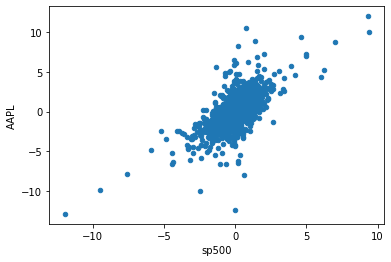

In [34]:
# Now let's plot the scatter plot and the straight line on one plot
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'AAPL')

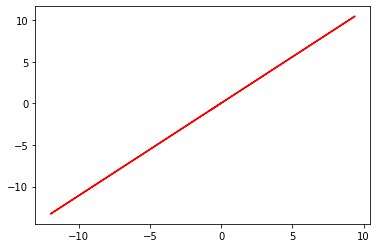

In [35]:
# Straight line equation with alpha and beta parameters 
# Straight line equation is y = beta * rm + alpha
plt.plot(stocks_daily_return['sp500'], beta * stocks_daily_return['sp500'] + alpha, '-', color = 'r')

<!-- TASK #5: APPLY THE CAPM FORMULA TO AN INDIVIDUAL STOCK -->

TASK #5: APPLY THE CAPM FORMULA TO AN INDIVIDUAL STOCK

In [36]:
beta

1.1128924148678123

In [37]:
# Let's calculate the average daily rate of return for S&P500
stocks_daily_return['sp500'].mean()

0.04931600660038911

In [38]:
# Let's calculate the annualized rate of return for S&P500 
# Note that out of 365 days/year, stock exchanges are closed for 104 days during weekend days (Saturday and Sunday) 
# Check your answers with: https://dqydj.com/sp-500-return-calculator/
rm = stocks_daily_return['sp500'].mean() * 252
rm

12.427633663298055

In [39]:
# Assume risk free rate is zero
# Also you can use the yield of a 10-years U.S. Government bond as a risk free rate
rf = 0 

# Calculate return for any security (APPL) using CAPM  
ER_AAPL = rf + ( beta * (rm-rf) ) 

In [40]:
ER_AAPL

13.830619238640288

TASK #6: CALCULATE BETA FOR ALL STOCKS

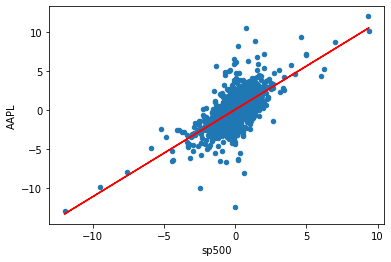

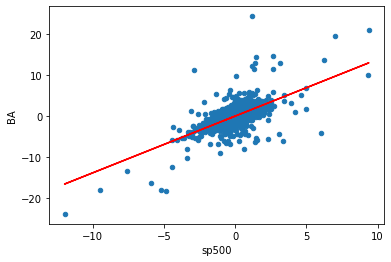

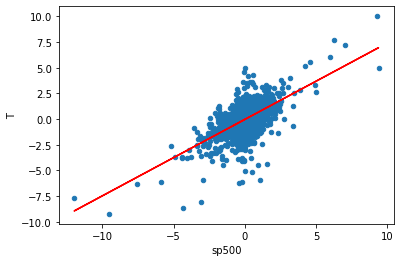

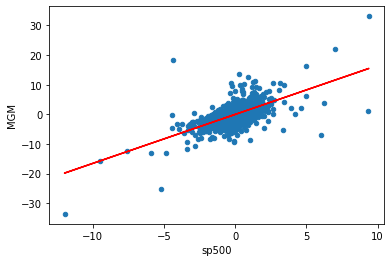

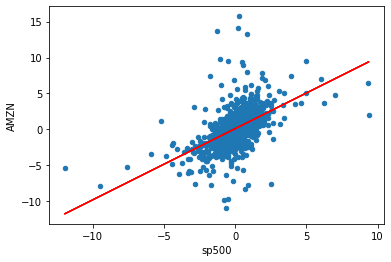

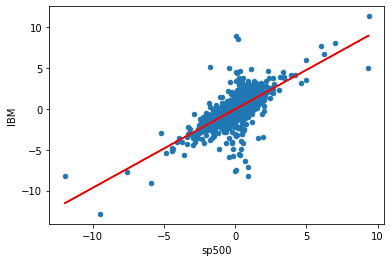

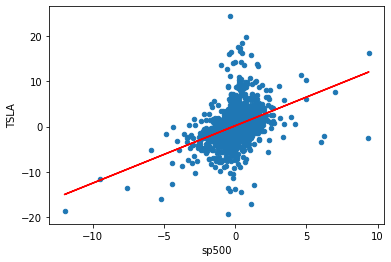

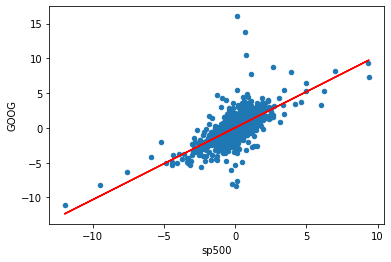

In [41]:
# Let's create a placeholder for all betas and alphas (empty dictionaries)
beta = {}
alpha = {}

# Loop on every stock daily return
for i in stocks_daily_return.columns:

  # Ignoring the date and S&P500 Columns 
  if i != 'Date' and i != 'sp500':
    # plot a scatter plot between each individual stock and the S&P500 (Market)
    stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = i)
    
    # Fit a polynomial between each stock and the S&P500 (Poly with order = 1 is a straight line)
    b, a = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return[i], 1)
    
    plt.plot(stocks_daily_return['sp500'], b * stocks_daily_return['sp500'] + a, '-', color = 'r')
    
    beta[i] = b
    
    alpha[i] = a
    
    plt.show()

In [42]:
# Let's view Beta for every stock 
beta

{'AAPL': 1.1128924148678123,
 'BA': 1.3828672010892789,
 'T': 0.7446293454747842,
 'MGM': 1.6535677065180123,
 'AMZN': 0.9917345712576859,
 'IBM': 0.9604149148095267,
 'TSLA': 1.2686150101095917,
 'GOOG': 1.0348817687428558}

In [43]:
# Let's view alpha for each of the stocks
# Alpha describes the strategy's ability to beat the market (S&P500)
# Alpha indicates the “excess return” or “abnormal rate of return,” 
# A positive 0.175 alpha for Tesla means that the portfolio’s return exceeded the benchmark S&P500 index by 17%.

In [44]:
alpha

{'AAPL': 0.05281208469440257,
 'BA': -0.0022906983297534818,
 'T': -0.02856343019846183,
 'MGM': -0.016885305520478917,
 'AMZN': 0.10221396417765179,
 'IBM': -0.053454941504451174,
 'TSLA': 0.1758349216516581,
 'GOOG': 0.03335558721466991}

TASK #7: APPLY CAPM FORMULA TO CALCULATE THE RETURN FOR THE PORTFOLIO

In [45]:
# Obtain a list of all stock names
keys = list(beta.keys())
keys

['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG']

In [46]:
# Define the expected return dictionary
ER = {}

rf = 0 # assume risk free rate is zero in this case
rm = stocks_daily_return['sp500'].mean() * 252 # this is the expected return of the market 
rm

12.427633663298055

In [47]:
for i in keys:
  # Calculate return for every security using CAPM  
  ER[i] = rf + ( beta[i] * (rm-rf) ) 

In [48]:
for i in keys:
  print('Expected Return Based on CAPM for {} is {}%'.format(i, ER[i]))

Expected Return Based on CAPM for AAPL is 13.830619238640288%
Expected Return Based on CAPM for BA is 17.185766980127884%
Expected Return Based on CAPM for T is 9.253980720502025%
Expected Return Based on CAPM for MGM is 20.549933694065807%
Expected Return Based on CAPM for AMZN is 12.324913942818482%
Expected Return Based on CAPM for IBM is 11.935684726020407%
Expected Return Based on CAPM for TSLA is 15.765882605403164%
Expected Return Based on CAPM for GOOG is 12.861131506762147%


In [49]:
# Assume equal weights in the portfolio
portfolio_weights = 1/8 * np.ones(8) 
portfolio_weights

array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

In [50]:
# Calculate the portfolio return 
ER_portfolio = sum(list(ER.values()) * portfolio_weights)
ER_portfolio

14.213489176792526

In [51]:
print('Expected Return Based on CAPM for the portfolio is {}%\n'.format(ER_portfolio))

Expected Return Based on CAPM for the portfolio is 14.213489176792526%

